# Mushroom classification as edible or poisonous


**OVERVIEW**

In this research project, we will use the secondary mushroom dataset from UCI machine learning repository https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset. The dataset contains information on 61K mushrooms. The goal is to classify mushrooms as poisonous or edible and identify features contributing to classification. 

### CRISP-DM Framework

![Image Alt Text](./images/crisp.png)

To frame the task, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. 

### Problem Understanding

We are tasked with classifying and identifying key features contribting to the classification of mushrooms as poisonous or edible.

To achieve the goal of classifying mushrooms and identifying contributing features CRISP-DM model can be used for process guidance -

* Data understanding - Explore the provided data, visualize using plots, check for completness, identifiy if any conversions need to be applied to categorical and numerical data
    
* Data Preparaion - Clean and apply indentified transformations

* Modeling - Perform modeling using classification models like KNN, Logistic Regression, Decission Tree, SVM and custom Gradient Descent for Logistic Regression. 

* Evaluation - Using the selected model, identify what features contribute to classification and if any further re-evaluation needed.
Compare model performance using metrics like training time, accuracy score for training and test
data.

* Deployment - Share the findings with recommendations for deployment. 

* Once deployment the system can be monitored for performance and make necessary adjustments as needed.

### Data Understanding

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score
import time
import math

#### Data Acquisition

Fetch the "Secondary Mushroom" dataset from the UCI Machine Learning Repository using the ucimlrepo package.

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 

In [3]:
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets

In [4]:
# Combine features and target into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

### Data Exploration

There are 21 columns, three numerical and 18 categorical, target columns is the class with values of type 'e' (Edible) and 'p' (Poisonous). 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [6]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [7]:
df.sample(20)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
23075,9.62,x,t,n,f,a,d,w,11.11,26.22,...,NaN,w,NaN,NaN,f,f,NaN,d,a,p
51370,4.68,x,s,o,f,p,NaN,n,5.46,11.62,...,NaN,e,NaN,NaN,f,f,NaN,d,u,e
18688,8.09,f,y,u,f,s,c,y,7.72,17.10,...,y,e,NaN,NaN,f,f,NaN,d,a,p
54389,7.25,x,w,y,f,f,f,f,5.32,11.72,...,NaN,y,NaN,NaN,f,f,NaN,d,u,e
21365,4.02,f,t,n,f,d,NaN,o,6.21,7.47,...,t,o,NaN,NaN,f,f,NaN,d,a,e
42756,13.41,f,s,w,t,e,NaN,n,8.57,18.54,...,NaN,w,NaN,NaN,t,l,NaN,m,a,e
44636,9.12,p,y,w,f,NaN,NaN,p,17.13,18.57,...,NaN,w,NaN,NaN,f,f,NaN,d,a,p
21949,4.61,x,NaN,y,f,a,c,y,5.16,9.69,...,NaN,w,NaN,NaN,f,f,NaN,d,u,e
46993,1.36,x,NaN,n,f,NaN,NaN,n,4.49,2.22,...,s,n,NaN,NaN,f,f,k,g,a,p
60240,9.86,o,NaN,n,f,f,f,f,3.75,25.39,...,g,n,NaN,NaN,f,f,NaN,d,s,p


#### List of categorical and numerical features

In [8]:
# List of categorical and numerical features
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                        'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
                        'stem-surface', 'stem-color', 'veil-type', 'veil-color',
                        'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season', 'class']

numerical_features = ['cap-diameter', 'stem-height', 'stem-width']

### Visualization


### Histograms: Displaying the distribution of each numerical feature.
Show the histogram plots side by side in a grid

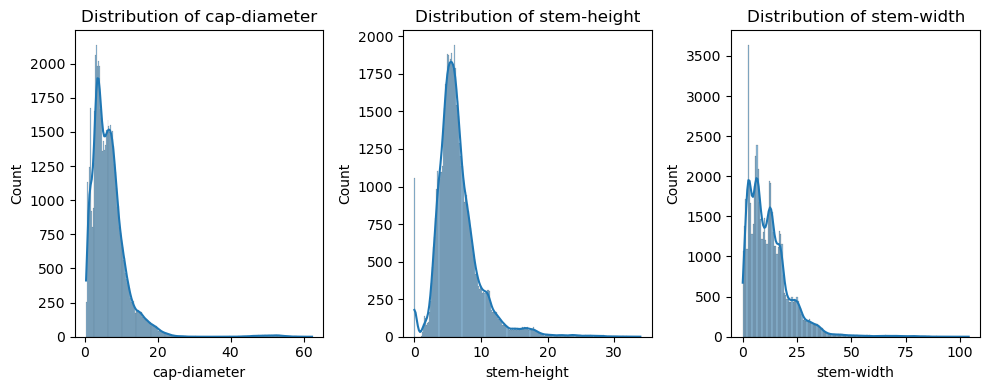

In [9]:
# Determine the number of rows and columns
num_features = len(numerical_features)
cols = 3  # Number of columns for side-by-side histograms
rows = math.ceil(num_features / cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,4))
axes = axes.flatten()

# Loop through features and create histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations from histograms displaying the distribution of each numerical feature

From distribution we can observe all of the numerical features **cap-diameter, stem-height and stem-width** are right skewed indicating most individuals have similar sizes for cap diameter, stem height, and stem width, with fewer individuals having large values.

### Bar Plots: Showing the count of each category for categorical features.
Show count plots side by side in a grid

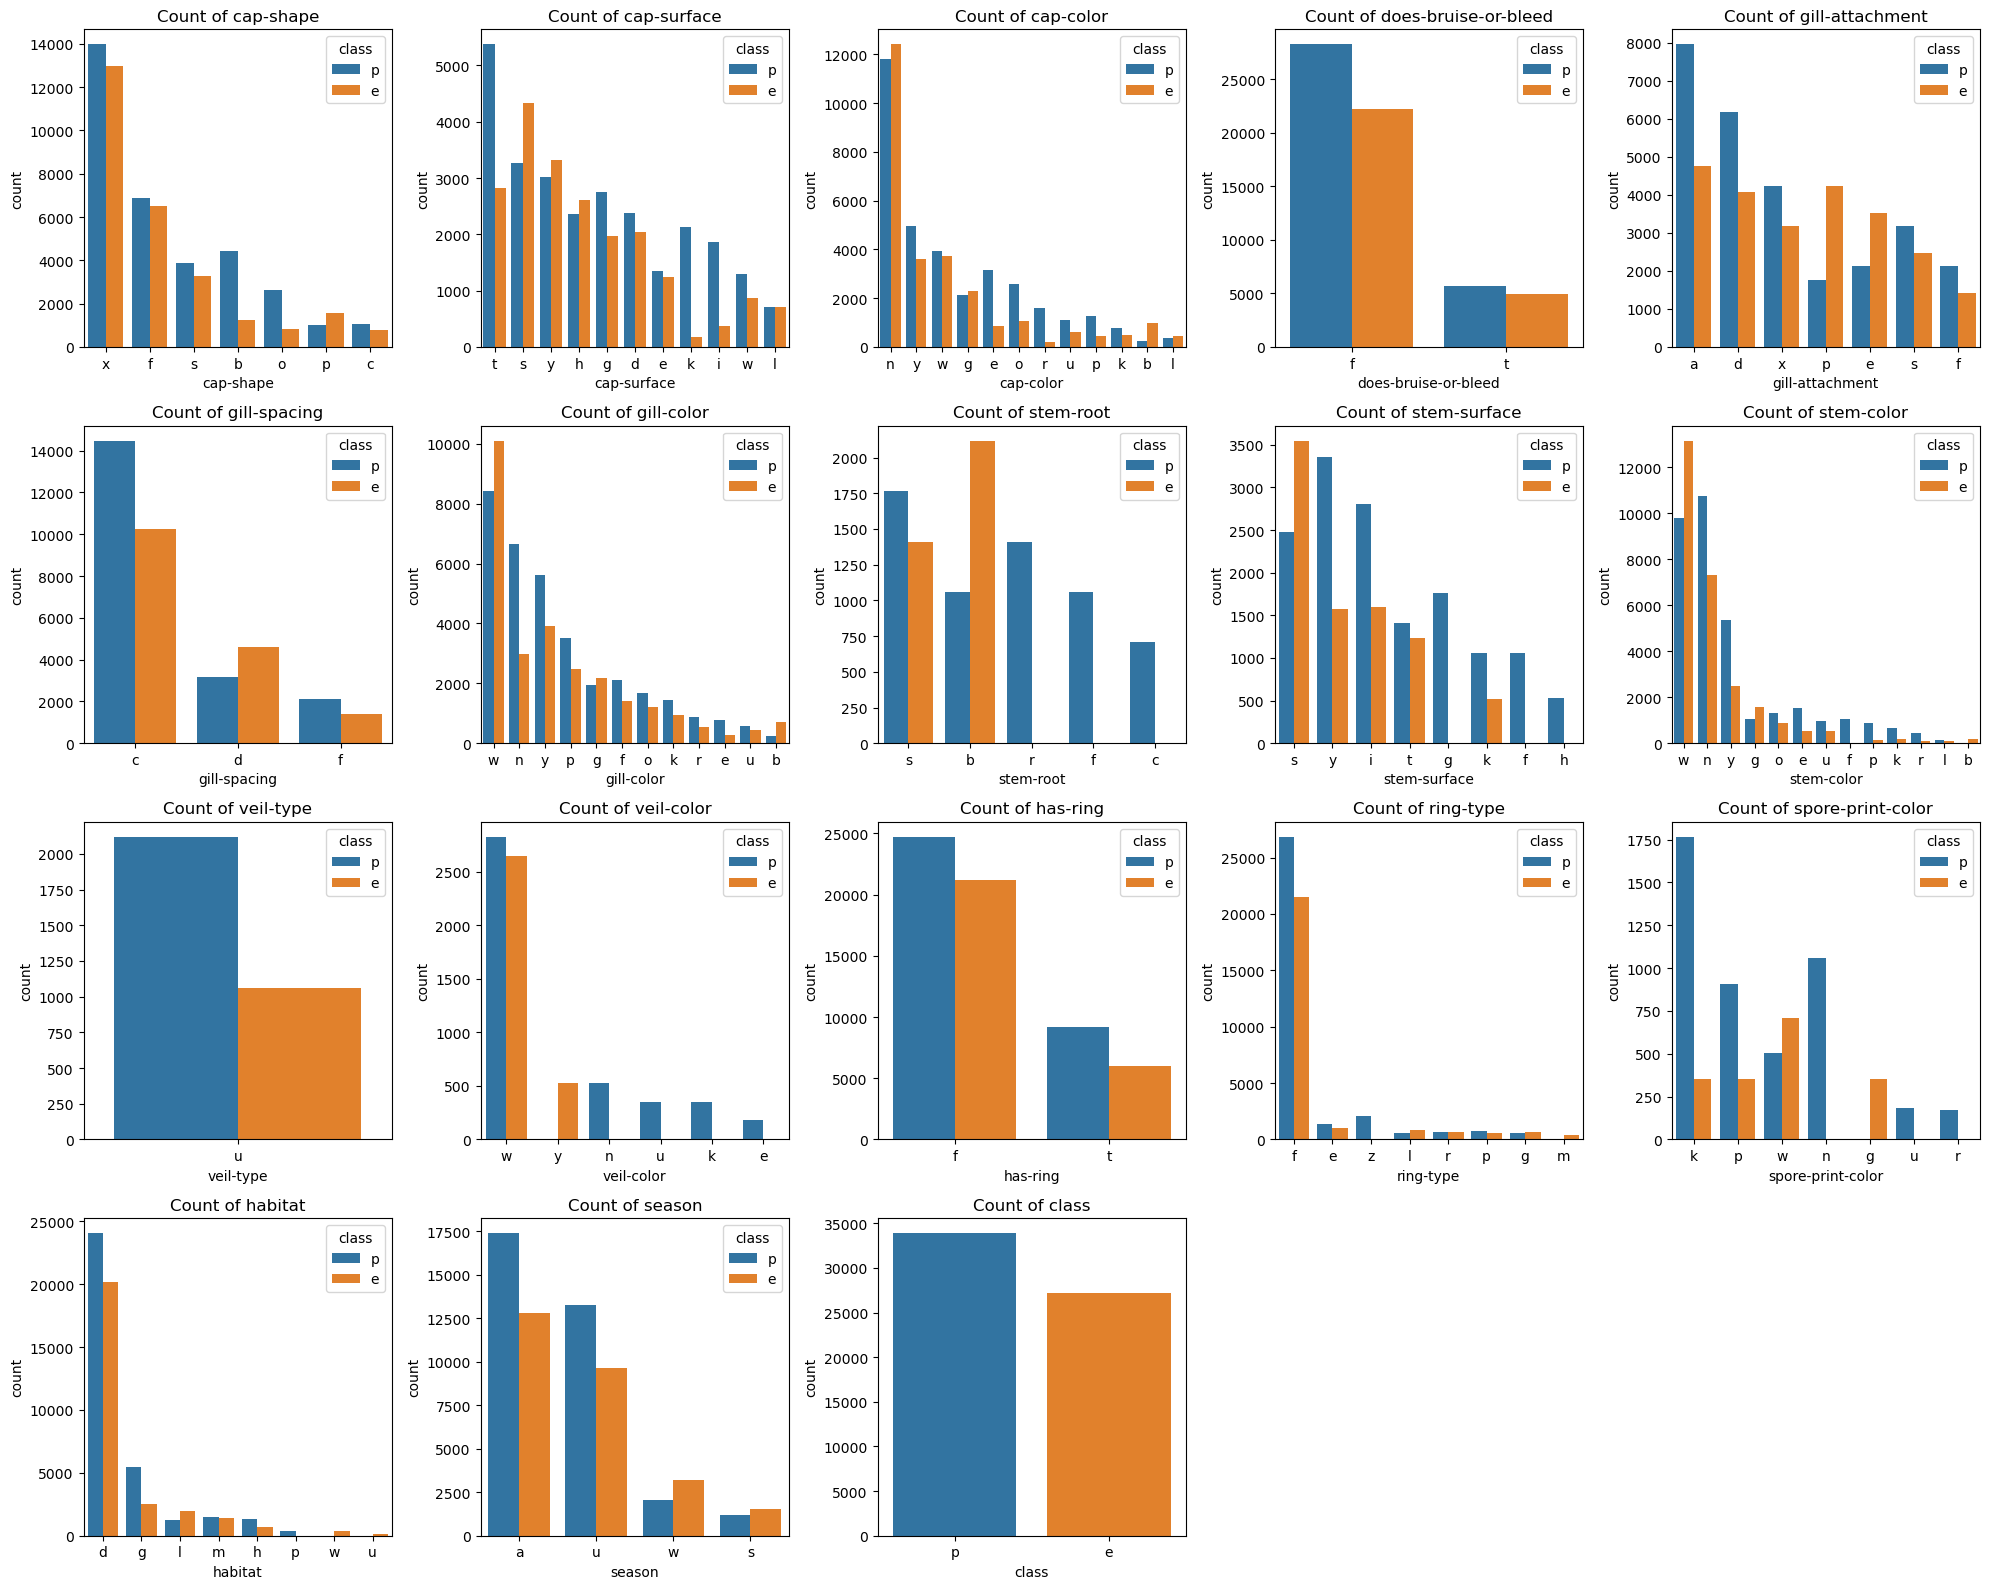

In [10]:
# Determine the number of rows and columns
num_features = len(categorical_features)
cols = 5  
rows = math.ceil(num_features / cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

# Loop through categorical columns and create count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, hue='class', ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].tick_params(axis='x')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
   fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations from bar plots showing the count of each category for categorical features.
Following can be inferred about mushroom charactersics from each of the Count plots:
- **Cap shape** - Top three attributes are convex, flat and sunken with bottom two attributes being spherical and conical
- **Cap surface** - Top three attributes are sticky, smooth and scaly with bottom two attributes being wrinkled and leathry
- **Cap color** - Top three attributes are brown, yellow and white with bottom two attributes being buff and blue
- **Bruise or Bleed** Majority of mushroom don't bruise or bleed
- **Gill attachement type** - Top three attributes are adnate, decurrent and adnexed with bottom two attributes being sinuate and none
- **Gill spacing type** -  More of type close compared to distant
- **Gill color type** - Top three attributes are white, brown and yellow with bottom two attributes being purple and buff
- **Stem root type** - Top three attributes are wollen, bulbuous and rooted
- **Stem surface type** - Top three attributes are smooth, scaly and fibrous with bottom two attributes being none and Shiny
- **Stem color** - Top three attributes are white, brown and yellow with bottom two attributes being blue and buff
- **Veil color** - Top three attributes are white, yellow and brown with bottom two attributes being black and red
- **Ring** - Majority of mushrooms don't have ring
- **Ring Type** - Top three attributes are none, evanescent and zone with bottom two attributes being grooved and movable
- **Spore sprint color** - Top three attributes are black , pink and white with bottom two attributes being purple and green
- **Habitat** - Top three habitats are woods, grasses and leaves with bottomn two habitats being waste and urban
- **Seasons** - Mushroom growth numbers in decreasing order of season autumn, summer, winter and spring
- **Poisonous and edible** - More poisonous types compared to edible types

### Box Plots: Visualizing the distribution of numerical features grouped by the target class.
Show the box plots side by side in a grid

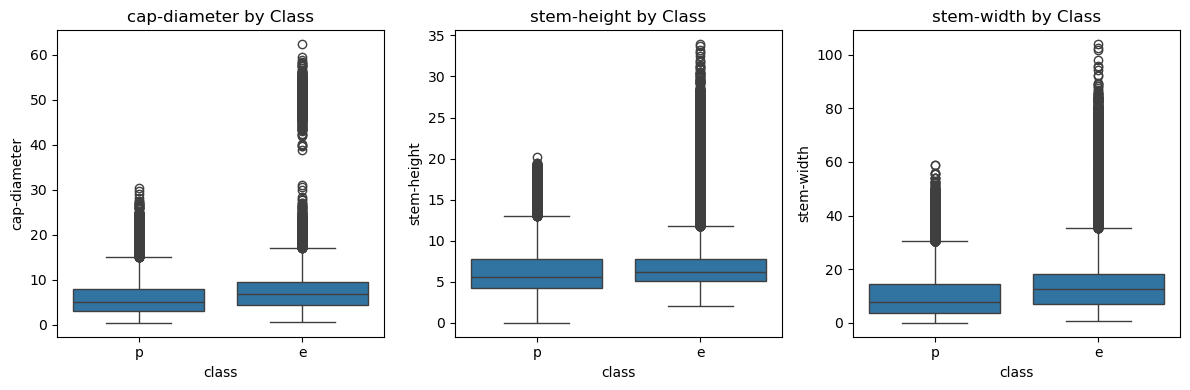

In [11]:
# Determine the number of rows and columns
num_features = len(numerical_features)
cols = 3  # Number of columns for side-by-side histograms
rows = math.ceil(num_features / cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,4))
axes = axes.flatten()

# Loop through features and create boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='class', y = feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Class')
    axes[i].tick_params(axis='x')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations from box plots visualizing the distribution of numerical features grouped by the target class.

Following can be inferred about the target class from box plots
- Cap Diameter tends to be smaller for poisonous mushrooms
- Stem height tends to be smaller for poisonous mushrooms
- Stem width tends to be smaller for poisonous mushrooms

### Pair Plot: Showing pairwise relationships between numerical features, colored by class.


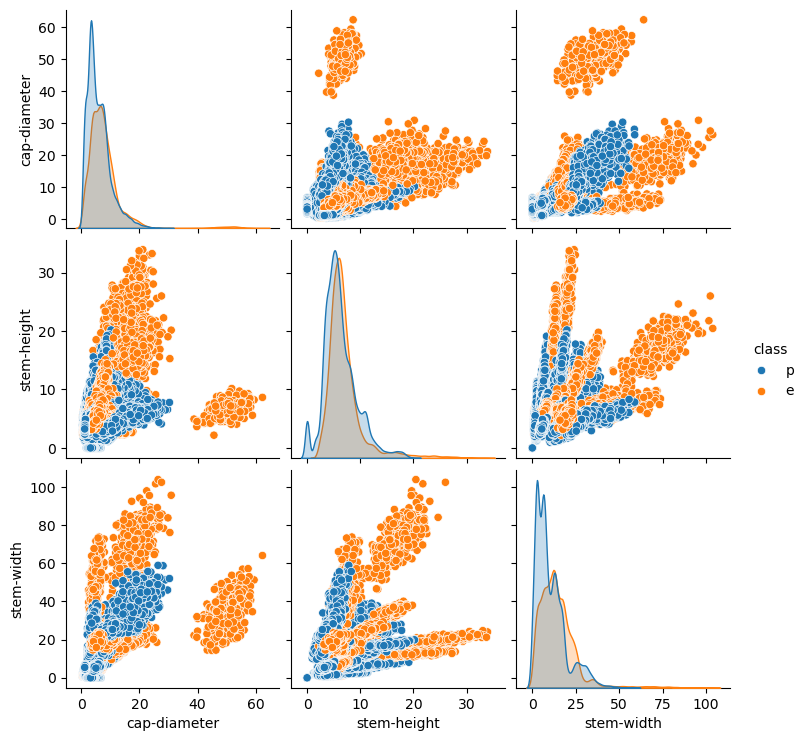

In [12]:
# Pair plot for numerical features
sns.pairplot(df[numerical_features + ['class']], hue='class')
plt.show()

#### Observations from pair plot showing pairwise relationships between numerical features, colored by class.

From pair plot we can observe poisonous mushrooms generally tend to be of smaller stem-width, cap-diameter and stem-height.

### Heatmap: Showing the correlation matrix for numerical features, indicating the strength of relationships between them.


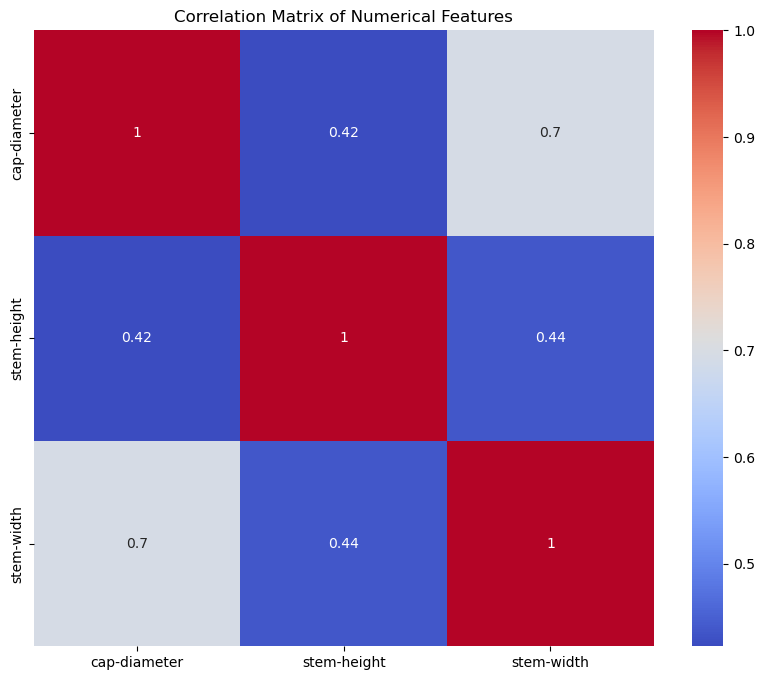

In [13]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations from heatmap showing the correlation matrix for numerical features, indicating the strength of relationships between them.

From Correlation matrix we can see 
- There is high correlation between stem-width and cap-diameter 
- Which is then followed by correlation between stem-height and stem-width

## Data Preparation

After our initial exploration and fine tuning of the problem understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Drop columns with just one type
We will drop the veil column as there is just one type 

In [14]:
#dropping variable veil_type
df = df.drop(["veil-type"], axis = 1)

### Drop columns with more than 30% missing values

In [15]:
threshold = 30
missing_percent = df.isnull().sum() / len(df) * 100
print("Missing Percent:\n", missing_percent)
columns_to_drop = missing_percent[missing_percent > threshold].index

df.drop(columns=columns_to_drop, inplace=True)
print("\nRemaining columns:\n", df.columns)


Missing Percent:
 cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
class                    0.000000
dtype: float64

Remaining columns:
 Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season', 'class'],
      dtype='object')


#### Update categorical features list based on remaining columns

In [16]:
# Update categorical features list based on remaining columns
categorical_features = [col for col in categorical_features if col in df.columns]

print(categorical_features)

['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season', 'class']


### Fill remaining missing values with the mode (most frequent value)

In [17]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

/var/folders/cf/pnbkjrjd1fg6hkp44jnqp0j40000gn/T/ipykernel_11614/1167435191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


### Apply encoding based on the number of unique values

For categorical features more than two unique values use frequency encoding, for features with two unique values use binary encoding

In [18]:
# Apply encoding based on the number of unique values
for col in categorical_features:
    unique_values = df[col].nunique()
    if unique_values > 2:
        # Frequency encoding
        freq_encoding = df[col].value_counts().to_dict()
        df[col] = df[col].map(freq_encoding)
    elif unique_values == 2:
        # Binary encoding
        df[col] = pd.factorize(df[col])[0]

### Verify the encoding

In [19]:
# Verify the encoding
print("Data after frequency encoding:")
df.sample(10)

Data after frequency encoding:


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
29913,3.95,7164,4432,1709,1,10247,5983,4.86,6.92,2626,1,50832,44209,22898,1
3140,17.17,13404,6341,7666,0,22582,18521,19.18,19.31,18063,0,353,2920,30177,1
36709,3.70,5694,7608,8543,0,22582,1399,7.51,8.03,7865,0,2118,44209,30177,0
7867,2.74,13404,4432,1230,0,7413,9546,4.76,2.89,18063,1,50832,44209,30177,0
32162,3.76,5694,22316,24218,0,7413,5983,4.90,3.55,18063,1,50832,7943,22898,0
45252,2.97,5694,6341,24218,0,22582,9645,6.38,2.68,22926,1,50832,44209,2727,1
3915,3.64,26934,6341,8543,0,22582,18521,4.99,3.43,18063,0,1399,44209,30177,0
17779,8.19,26934,22316,4420,0,22582,18521,7.32,13.22,22926,1,50832,44209,30177,1
17312,10.01,26934,7608,7666,0,5648,18521,6.64,32.55,22926,1,50832,44209,2727,1
40229,1.41,13404,22316,1709,0,22582,18521,2.73,3.28,1490,1,50832,44209,30177,0


#### Target column

In [20]:
target_column='class'

### Separate features and target variable

In [21]:
# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

#### Scale all features using MinMax scaler to ensure they are on a similar scale

In [22]:
# Scale all features to ensure they are on a similar scale
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#### Heatmap of all features after encoding

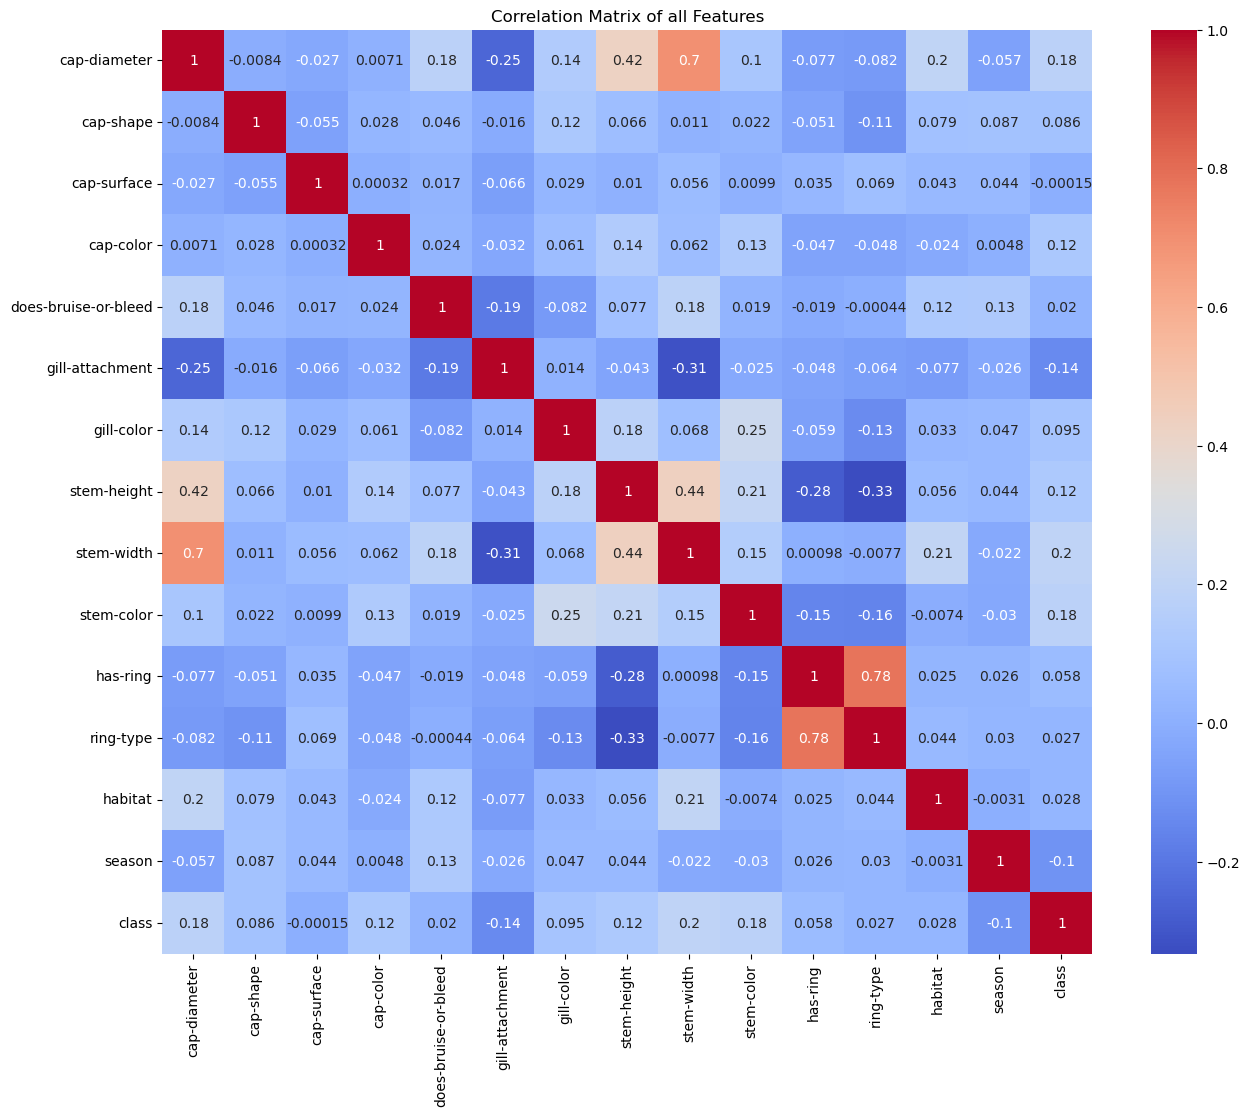

In [23]:
# Heatmap for correlation between all features
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of all Features')
plt.show()

##### Observations from heatmap of all features after encoding

We can observe
- Target 'class' shows higher correlation to features like cap-diameter, stem-color, stem-height, cap-color  
- Target 'class' is negatively correlated to features like season, gill-attachment

### Split training and test data

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preparation complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data preparation complete.
X_train shape: (48855, 14)
X_test shape: (12214, 14)
y_train shape: (48855,)
y_test shape: (12214,)


## Modeling

#### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### DummyClassifier as a baseline

In [25]:
# DummyClassifier as a baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
print("Dummy Classifier (Most Frequent) Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Classification Report:\n", classification_report(y_test, y_pred_dummy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))


Dummy Classifier (Most Frequent) Accuracy: 0.5549369575896512
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      6778
           1       0.00      0.00      0.00      5436

    accuracy                           0.55     12214
   macro avg       0.28      0.50      0.36     12214
weighted avg       0.31      0.55      0.40     12214

Confusion Matrix:
 [[6778    0]
 [5436    0]]


/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### A Simple Model
Define default models for **LogisticRegression, KNN, SVC and DecisionTree**

In [26]:
# Initialize and train models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42) ,
    "Support Vector Machine": SVC(random_state=42)
}

#### Function to train and evaluate models - training time, accuracy, recall and precision score for test and train data

In [27]:
def evaluateModels(models):
   results = {}
   # Train and evaluate the models
   for model_name, model in models.items():
      # Measure training time
      start_time = time.time()
      model.fit(X_train, y_train)
      end_time = time.time()
      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      # Evaluate the model
      accuracy_train = accuracy_score(y_train, y_pred_train)
      accuracy_test = accuracy_score(y_test, y_pred_test)
                      
      recall_train = recall_score(y_train, y_pred_train)
      recall_test = recall_score(y_test, y_pred_test)
                                  
      precision_train = precision_score(y_train, y_pred_train)
      precision_test = precision_score(y_test, y_pred_test)

      # Store the results
      results[model_name] = {
        'Train Time': end_time - start_time,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Recall' : recall_train,
        'Test Recall' : recall_test,
        'Train Precision': precision_train,
        'Test Precision' : precision_test
      }
   
   # Set display options to show all columns and a wide display width
    #pd.set_option('display.max_columns', None)
   pd.set_option('display.width', 1000)
   # Display the results
   results_df = pd.DataFrame(results).T
   print(results_df)

### Train and evaluate models using models with with default values

In [28]:
evaluateModels(models)


                        Train Time  Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  Test Precision
K-Nearest Neighbors       0.104367        0.998403       0.995988      0.997379     0.993194         0.999033        0.997782
Decision Tree             0.235294        1.000000       0.994187      1.000000     0.992642         1.000000        0.994288
Logistic Regression       0.101608        0.642391       0.639921      0.505036     0.505151         0.620803        0.616524
Support Vector Machine   77.136296        0.918903       0.915916      0.880708     0.880795         0.933330        0.926650


## Model Optimization
Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  

#### Define parameter grids for each model

In [29]:
# Define parameter grids for each model
param_grids = {
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [500, 1000],  # Increased max_iter values
        'tol': [1e-4, 1e-3, 1e-2]  # Added tolerance parameter
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'probability': [True]
   }
}

#### Grid search with Cross-Validation

In [30]:
# Perform Grid Search with Cross-Validation
best_models = {}
for model_name, model in models.items():
    print(f"\nPerforming Grid Search for {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")



Performing Grid Search for K-Nearest Neighbors


Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for K-Nearest Neighbors: 0.9981168764711903

Performing Grid Search for Decision Tree
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.9939821922014124

Performing Grid Search for Logistic Regression
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'solver': 'liblinear', 'tol': 0.01}
Best cross-validation score for Logistic Regression: 0.6422679357281753

Performing Grid Search for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 100, 'kernel': 'rbf', 'probability': True}
Best cross-validation score for Support Vector Machine: 0.9800634530754273


## Evaluate best models

Look at training time, accuracy, recall and precision score

In [31]:
evaluateModels(best_models)

                        Train Time  Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  Test Precision
K-Nearest Neighbors       0.091304        1.000000       0.998117      1.000000     0.996873         1.000000        0.998894
Decision Tree             0.233427        0.999959       0.994105      0.999908     0.993010         1.000000        0.993741
Logistic Regression       0.193026        0.642166       0.639348      0.505082     0.504783         0.620403        0.615661
Support Vector Machine  257.425290        0.982929       0.978385      0.974799     0.969095         0.986687        0.982103


## Feature Importance (using results from best models)
Determine Feature importance for Decision Tree, use coefficients from Logistic Regression and permutation importance for Support Vector Machine

### Decision Tree feature Importance 

Using the best model for Decision Tree view important features contributing to classification

In [32]:
dt_model = best_models["Decision Tree"]
dt_feature_importances = dt_model.feature_importances_
dt_features = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_importances}).sort_values(by='Importance', ascending=False)


### Features
We can observe **stem-width, stem-color, cap-surface, gill-color and stem-height** are most important features identified by decision tree classifier

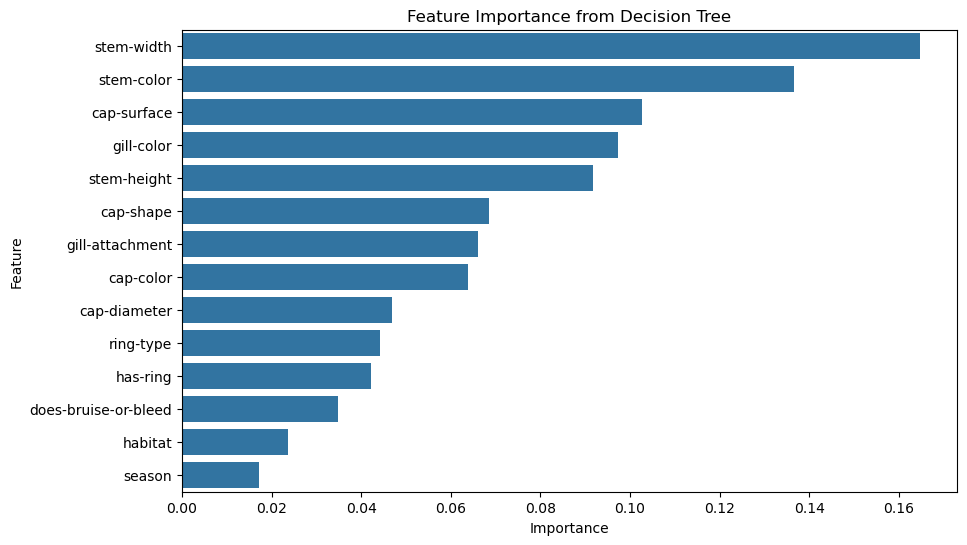

In [33]:
# Plot Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_features)
plt.title('Feature Importance from Decision Tree')
plt.show()

In [34]:
# Display Top Features
print("Top features from Decision Tree:")
print(dt_features.head(10))

Top features from Decision Tree:
            Feature  Importance
8        stem-width    0.164730
9        stem-color    0.136506
2       cap-surface    0.102686
6        gill-color    0.097394
7       stem-height    0.091679
1         cap-shape    0.068448
5   gill-attachment    0.065995
3         cap-color    0.063732
0      cap-diameter    0.046886
11        ring-type    0.044096


### Logistic Regression Coefficients

In [35]:
lr_model = best_models["Logistic Regression"]
lr_coefficients = lr_model.coef_[0]
lr_features = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coefficients}).sort_values(by='Coefficient', ascending=False)


### Features
From the plot we can observe **cap-diameter, stem-width, stem-height and has-ring** are significant factors identified by Logistic Regression

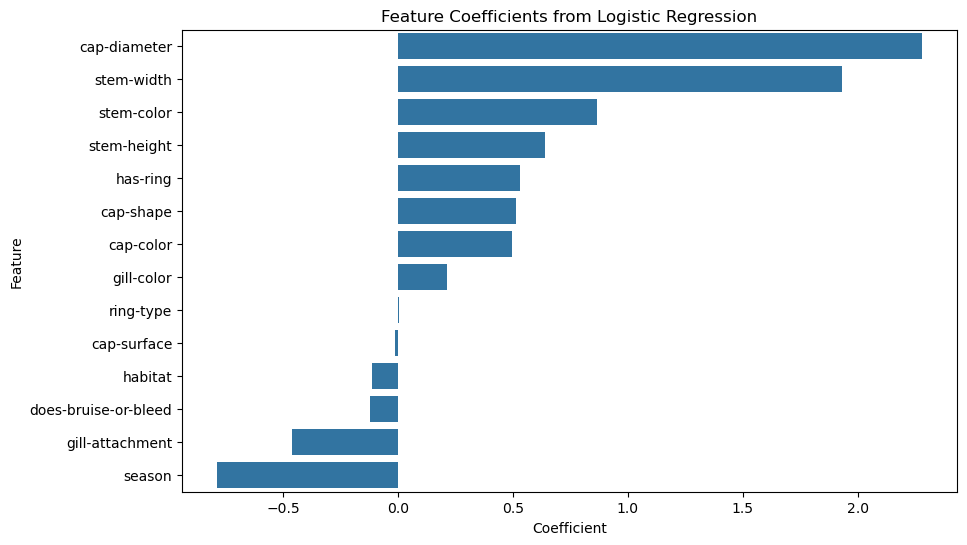

In [36]:
# Plot Coefficients for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_features)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()

### Support Vector Machine permutation feature importance
For SVM we will use permutation score to determine important features

In [37]:
from sklearn.inspection import permutation_importance

# Permutation feature importance
result = permutation_importance(best_models['Support Vector Machine'], X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

### Features

From permutation features importance for SVM we can see **gill-attachement, stem-color, gill-color, cap-surface and cap-shape** are most important features influencing the classification

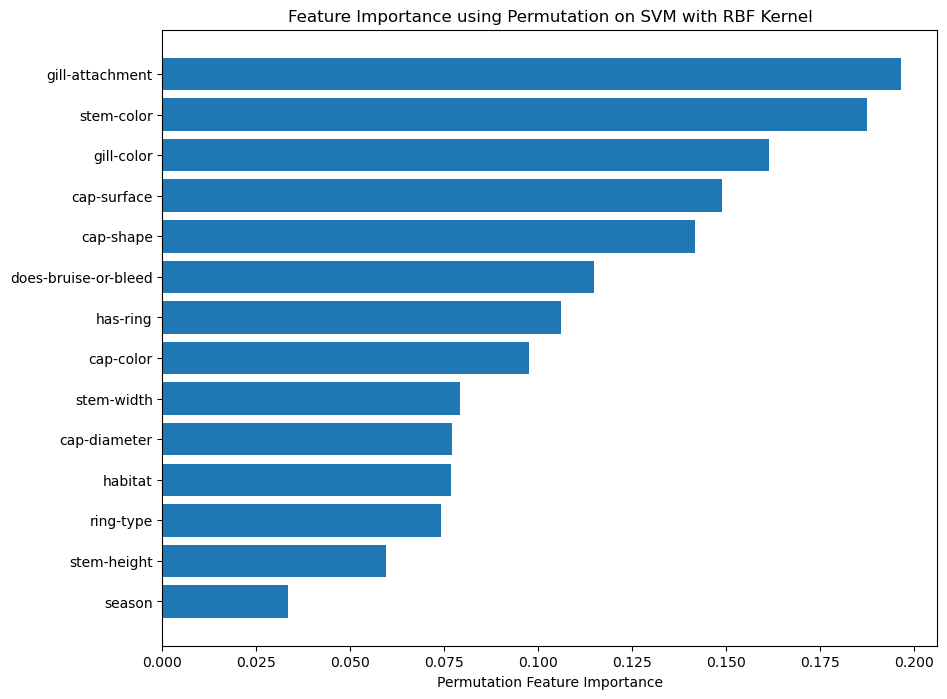

In [38]:
# Plotting the feature importances
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.title("Feature Importance using Permutation on SVM with RBF Kernel")
plt.show()

## Custom logistic regression with gradient descent

We will implement gradient descent for logistic regression to see if this does any better than prior results obtained for logistic regression using default model and best parameters using grid search

### Logistic Regression Hypothesis
The hypothesis for logistic regression is the sigmoid function applied to the linear combination of input features

In [39]:
# Define the custom logistic regression with gradient descent
def sigmoid(z):
    # Prevent overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

### Cost Function
The cost function for logistic regression is the log loss (cross-entropy loss)

In [40]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-10  # Small value to prevent log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

### Compute Gradient

In [41]:
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient


### Function to perform gradient descent

In [42]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    gradient_norms = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        
        # Calculate the norm of the gradient
        gradient_norm = np.linalg.norm(gradient)
        gradient_norms.append(gradient_norm)
        
        # Print gradients before applying gradient descent
        if i % 100 == 0:
            print(f"Iteration {i} - Gradients Norm: {gradient_norm}")

        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history, gradient_norms


### Add intercept term

In [43]:

# Add intercept term
X_train_bias = np.insert(X_train.values, 0, 1, axis=1)
X_test_bias = np.insert(X_test.values, 0, 1, axis=1)

### Initialize Theta

In [44]:
# Initialize theta
theta = np.zeros(X_train_bias.shape[1])


### Hyperparameters for custom logistic regression

In [45]:
# Hyperparameters
learning_rate = 0.1
num_iterations =5000


### Train the custom logistic regression model

In [46]:
# Train model
theta_optimal, cost_history, gradient_norms  = gradient_descent(X_train_bias, y_train.values, theta, learning_rate, num_iterations)


Iteration 0 - Gradients Norm: 0.11996736919722308
Iteration 100 - Gradients Norm: 0.03959282720308582


Iteration 200 - Gradients Norm: 0.028675213768230956
Iteration 300 - Gradients Norm: 0.021620487209505435
Iteration 400 - Gradients Norm: 0.016942745461687277
Iteration 500 - Gradients Norm: 0.013770877457389613
Iteration 600 - Gradients Norm: 0.011578423501656141
Iteration 700 - Gradients Norm: 0.010035046546629265
Iteration 800 - Gradients Norm: 0.008926839611009879
Iteration 900 - Gradients Norm: 0.008112423299477508
Iteration 1000 - Gradients Norm: 0.007497419291669786
Iteration 1100 - Gradients Norm: 0.007018630905010837
Iteration 1200 - Gradients Norm: 0.0066337292744225165
Iteration 1300 - Gradients Norm: 0.006314351262232747
Iteration 1400 - Gradients Norm: 0.006041452725337275
Iteration 1500 - Gradients Norm: 0.005802192456860946
Iteration 1600 - Gradients Norm: 0.005587855560091953
Iteration 1700 - Gradients Norm: 0.005392476146666279
Iteration 1800 - Gradients Norm: 0.00521192589066269
Iteration 1900 - Gradients Norm: 0.0050433107342634925
Iteration 2000 - Gradients Norm: 0.

### Predict train and test accuracy using custom logistic regression

In [47]:
threshold = 0.5

# Predict using custom logistic regression
y_train_pred_gd = sigmoid(X_train_bias.dot(theta_optimal)) >= threshold
accuracy_gd = accuracy_score(y_train, y_train_pred_gd)
print(f"Custom Logistic Regression Train Accuracy: {accuracy_gd * 100:.2f}%")

y_pred_gd = sigmoid(X_test_bias.dot(theta_optimal)) >= threshold
accuracy_gd = accuracy_score(y_test, y_pred_gd)
print(f"Custom Logistic Regression Test Accuracy: {accuracy_gd * 100:.2f}%")

Custom Logistic Regression Train Accuracy: 63.34%
Custom Logistic Regression Test Accuracy: 63.06%


### Plot gradient norms
After about 1000 iterations there isn't significant change in gradient norms

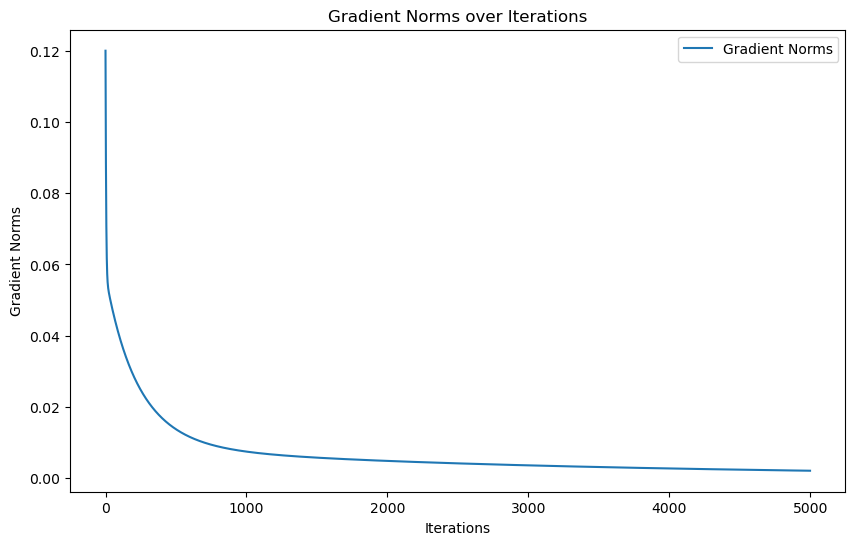

In [48]:
# Plot gradient norms
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), gradient_norms, label='Gradient Norms')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norms')
plt.title('Gradient Norms over Iterations')
plt.legend()
plt.show()


### Coefficients from Custom Logistic Regression

In [49]:
# Coefficients from Custom Logistic Regression
custom_lr_features = pd.DataFrame({'Feature': X.columns, 'Coefficient': theta_optimal[1:]})  # Exclude intercept
custom_lr_features = custom_lr_features.sort_values(by='Coefficient', ascending=False)


### Features
From custom logistic regression, we can see **stem-width, cap-diameter, stem-color and stem-height** are important features influencing the classification

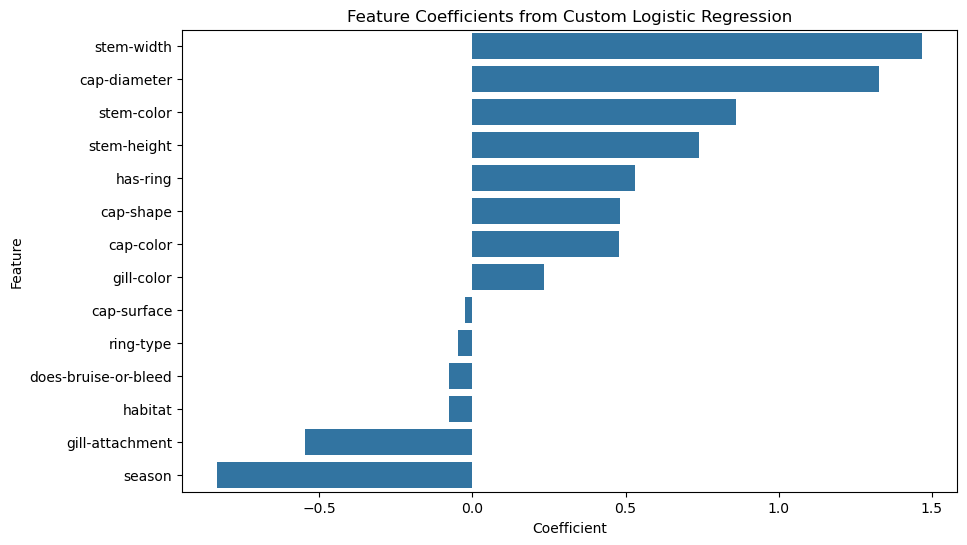

Top features from Custom Logistic Regression:
         Feature  Coefficient
8     stem-width     1.467568
0   cap-diameter     1.328843
9     stem-color     0.859161
7    stem-height     0.741522
10      has-ring     0.532288
1      cap-shape     0.481013
3      cap-color     0.479622
6     gill-color     0.234505
2    cap-surface    -0.023778
11     ring-type    -0.047904


In [50]:
# Plot Coefficients for Custom Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=custom_lr_features)
plt.title('Feature Coefficients from Custom Logistic Regression')
plt.show()

print("Top features from Custom Logistic Regression:")
print(custom_lr_features.head(10))


## Confirm if secondary mushroom data is linearly separable

From the low model scores for logistic regression compared to other models, it appears this dataset is not linearly separable.

We will plot PCA to confirm if data can be linearly separated.

In [51]:
from sklearn.decomposition import PCA

# Combine features and target into a single DataFrame
df_pca = pd.concat([X_train, y_train], axis=1)

# Reduce to two dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)
df_pca['pca-one'] = pca_result[:,0]
df_pca['pca-two'] = pca_result[:,1]
df_pca['class'] = y_train



### PCA plot to visualize if data is linearly separable
From the plot we can see the data is not linearly separable

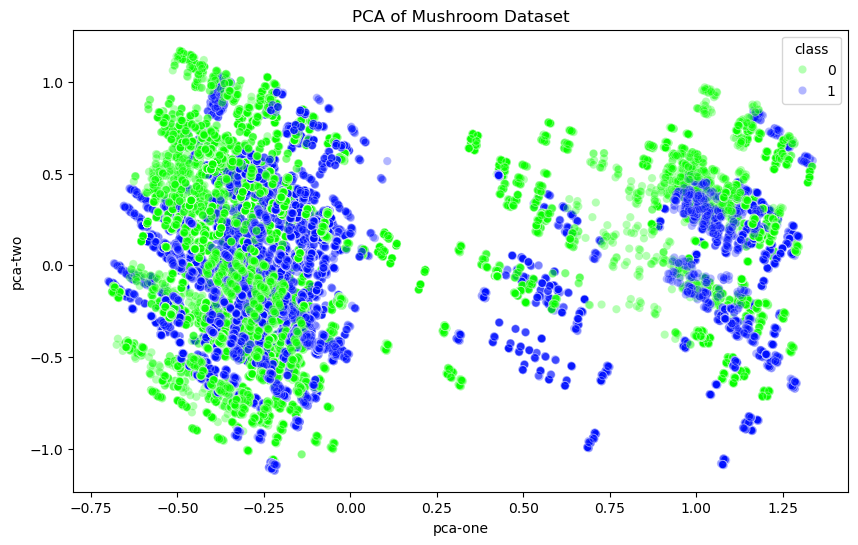

In [52]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=df['class'],
    palette=sns.color_palette("hsv", 2),
    data=df_pca,
    legend="full",
    alpha=0.3
)
plt.title('PCA of Mushroom Dataset')
plt.show()

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client. 

### Secondary Mushroom Dataset Analysis Report

##### 1. Introduction:

The secondary mushroom dataset contains information about various attributes of mushrooms, such as cap-shape, cap-color, stem-width,stem-height, stem-color, cap-surface, gill-color and habitat. The research project aims to classify and identify features influencing classification of mushrooms as poisonous or edible.

##### 2. Dataset Description (original dataset)
* **Number of Samples:** 61069
* **Number of Features:** 21
* **Categorical Features:** cap-shape, cap-surface, cap-color, does-bruise-or-bleed, gill-attachment, gill-spacing, gill-color, stem-root, stem-surface, stem-color, veil-type, veil-color, has-ring, ring-type, spore-print-color, habitat, season
* **Numerical Features:** cap-diameter, stem-height, stem-width
* **Target:** class

         
 
#### 3. Data Cleaning and Preprocessing:
* Dropped columns with more than 30% missing data
* Remaining missing values were filled with the mode (most frequent value) for each column
* Categorical features were identified and encoded 
   - Binary features were factorized (0 and 1) 
   - Features with more than two unique values were frequency encoded
* Numerical features were standardized using StandardScaler


#### 4. Exploratory Data Analysis (EDA):
* Pair Plot: Showing pairwise relationships between numerical features, colored by class.
* Box Plots: Visualizing the distribution of numerical features grouped by the target class.
* Heatmap: Showing the correlation matrix for numerical features, indicating the strength of relationships between them.

#### 5. Modeling Approach:
* Considered 
   - **KNN** 
   - **Logistic Regression** 
   - **Decision Tree****
   - **Support Vector Machine**
   - **Custom Logistic Regression using gradient decent**
* Evaluated model performance using training time, accuracy, recall and precision score
* Implemented 5-fold cross-validation for robust evaluation.


#### 6. Results:

We will use recall score for reccomedation as high recall ensures that most of the poisonous mushrooms are correctly identified as poisonous.

**Default Model:**

Dummy Classifier (Most Frequent) Accuracy: 0.5549369575896512

**Basic Models:**

                               Train Time  Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  Test Precision
       K-Nearest Neighbors       0.099588        0.998403       0.995988      0.997379     0.993194         0.999033        0.997782
       Decision Tree             0.225074        1.000000       0.994187      1.000000     0.992642         1.000000        0.994288
       Logistic Regression       0.090166        0.642391       0.639921      0.505036     0.505151         0.620803        0.616524
       Support Vector Machine   83.843968        0.918903       0.915916      0.880708     0.880795         0.933330        0.926650

**Optimized Models:**

                              Train Time  Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  Test Precision
       K-Nearest Neighbors       0.097432        1.000000       0.998117      1.000000     0.996873         1.000000        0.998894
       Decision Tree             0.267062        0.999959       0.994105      0.999908     0.993010         1.000000        0.993741
       Logistic Regression       0.217406        0.642166       0.639348      0.505082     0.504783         0.620403        0.615661
       Support Vector Machine  273.494926        0.982929       0.978385      0.974799     0.969095         0.986687        0.982103

**Custom Model (logistic regression using gradient decent):**

Custom Logistic Regression Train Accuracy: 63.34%
Custom Logistic Regression Test Accuracy: 63.06%


#### 7. Recommendations and Insights:
From the results Decision Tree can be recommended considering training time, recall score and interpretability.

Top 5 features influencing the classification based on decision tree feature importance
- stem-width
- stem-color
- cap-surface
- gill-color 
- stem-height

Lowest factors influencing the classification
- Habitat
- Season

 When classifying mushrooms, pay close attention to stem width, stem color, cap surface, gill color and stem height, as these features have significant differences between edible and poisonous mushrooms. Consider creating additional features or transformations of these key attributes to enhance the model's ability to discriminate between the classes.

#### 8. Conclusion:
KNN and Decision Tree models achieved high recall score, Decision Tree, Logistic Regression and Support Vector Machine provided additional interpretability through feature importance, coefficients and permutation importance, however logistic regression achieved low accuracy score across different tests indicating the data is not linearly separable. 

Decision Tree can be recommended considering training time, recall score and interpretability. The Decision Tree model identified stem-width, stem-color, cap-surface, gill-color and stem-height as the top five features in determining whether a mushroom is edible or poisonous. Cross-validation and hyperparameter tuning ensured robust model performance, with consistent results across different metrics.